In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.rcParams['figure.figsize']=[12,8]
matplotlib.rcParams['font.size']=20

import medusa.chem.chem_lib as chem_lib
from medusa.chem.chem_lib import ISOTOPE_DATA
from medusa.const.const_lib import *

# chem Module

The chem module provides a simple interface to read isotope data and metal abundance files. In particular, the ISOTOPE_DATA variable contains a dictionary with masses (in AMU), atomic numbers and mass numbers of multiple isotopes.

In [2]:
ISOTOPE_DATA

{'ac227': {'am': 227.0277523, 'an': 89, 'mn': 227},
 'ag107': {'am': 106.9050916, 'an': 47, 'mn': 107},
 'ag109': {'am': 108.9047553, 'an': 47, 'mn': 109},
 'al27': {'am': 26.98153853, 'an': 13, 'mn': 27},
 'am241': {'am': 241.0568293, 'an': 95, 'mn': 241},
 'am243': {'am': 243.0613813, 'an': 95, 'mn': 243},
 'ar36': {'am': 35.967545105, 'an': 18, 'mn': 36},
 'ar38': {'am': 37.96273211, 'an': 18, 'mn': 38},
 'ar40': {'am': 39.9623831237, 'an': 18, 'mn': 40},
 'as75': {'am': 74.92159457, 'an': 33, 'mn': 75},
 'at210': {'am': 209.9871479, 'an': 85, 'mn': 210},
 'at211': {'am': 210.9874966, 'an': 85, 'mn': 211},
 'au197': {'am': 196.96656879, 'an': 79, 'mn': 197},
 'b10': {'am': 10.01293695, 'an': 5, 'mn': 10},
 'b11': {'am': 11.00930536, 'an': 5, 'mn': 11},
 'ba130': {'am': 129.9063207, 'an': 56, 'mn': 130},
 'ba132': {'am': 131.9050611, 'an': 56, 'mn': 132},
 'ba134': {'am': 133.90450818, 'an': 56, 'mn': 134},
 'ba135': {'am': 134.90568838, 'an': 56, 'mn': 135},
 'ba136': {'am': 135.904

using this information we can calculate the binding energy of an atom $\rm X$,

$$E_{\rm bind,X}=\left(M_{\rm X}-M_{\rm p}Z-M_{\rm n}(A-Z)\right)m_{\rm u}c^2$$

where $M_{\rm X}$, $M_{\rm p}$, $M_{\rm e}$ and $M_{\rm n}$ are the masses in amu of atom X,
a proton, an electron and a neutron, and $m_{\rm u}$ is the atomic mass unit. Plotting binding energy per nucleon
shows that it peaks for iron, indication that energy can only be produced through fusion up to
that point. Including the main isotopes involved in different nuclear
burning stages, shows that the energy obtained per baryion of material burnt
decreases significantly after hydrogen is depleted.

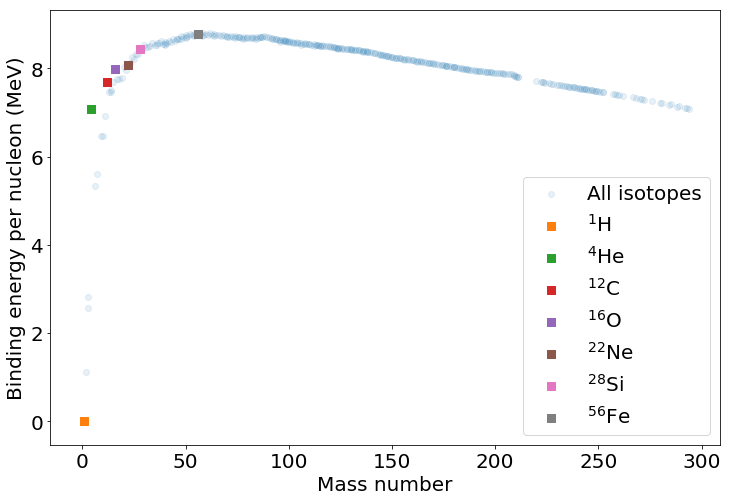

In [3]:
keys = [key for key in ISOTOPE_DATA.keys()]
#get some isotope indexes to plot then independently
ih1 = keys.index("h1")
ihe4 = keys.index("he4")
ic12 = keys.index("c12")
io16 = keys.index("o16")
ine22 = keys.index("ne22")
isi28 = keys.index("si28")
ife56 = keys.index("fe56")

atomic_nums = np.array([ISOTOPE_DATA[key]["an"] for key in keys])
atomic_masses = np.array([ISOTOPE_DATA[key]["am"] for key in keys])
mass_numbers = np.array([ISOTOPE_DATA[key]["mn"] for key in keys])

binding_energies = np.array([AMU*atomic_masses[i] - (MP+ME)*atomic_nums[i] - MN*(mass_numbers[i]-atomic_nums[i])
                    for i in range(len(atomic_nums))])*CLIGHT**2/(1e6*EV2ERG)
plt.gca().set_xlabel("Mass number")
plt.gca().set_ylabel("Binding energy per nucleon (MeV)")

plt.scatter(mass_numbers,-binding_energies/mass_numbers, label="All isotopes",alpha=0.1)
plt.scatter(mass_numbers[ih1],-binding_energies[ih1]/mass_numbers[ih1],
            marker="s", s=60, label="$^{1}$H")
plt.scatter(mass_numbers[ihe4],-binding_energies[ihe4]/mass_numbers[ihe4],
            marker="s", s=60, label="$^{4}$He")
plt.scatter(mass_numbers[ic12],-binding_energies[ic12]/mass_numbers[ic12],
            marker="s", s=60, label="$^{12}$C")
plt.scatter(mass_numbers[io16],-binding_energies[io16]/mass_numbers[io16],
            marker="s", s=60, label="$^{16}$O")
plt.scatter(mass_numbers[ine22],-binding_energies[ine22]/mass_numbers[ine22],
            marker="s", s=60, label="$^{22}$Ne")
plt.scatter(mass_numbers[isi28],-binding_energies[isi28]/mass_numbers[isi28],
            marker="s", s=60, label="$^{28}$Si")
plt.scatter(mass_numbers[ife56],-binding_energies[ife56]/mass_numbers[ife56],
            marker="s", s=60, label="$^{56}$Fe")

plt.legend(loc=4)
plt.show()

An additional simple exercise is to estimate the lifetime of the sun,
given its mass and luminosity. Assuming a hydrogen mass fraction of $X=0.7$
at the zero age main sequence, and that through the main sequence the star burns
$10\%$ of its hydrogen into helium, the lifetime is approximately given by

$$t_{\rm MS}=\frac{XM_{\odot}(4M_{\rm p}+2M_{\rm e}-M_{\rm He})c^2}{4M_{\rm p}L_\odot}.$$

Where $M_{\rm He}$ is the atomic weight of $^4$He. Let's calculate this.

In [4]:
0.1*0.7*MSUN*(4*MP+2*ME-ISOTOPE_DATA["he4"]["am"]*AMU)*CLIGHT**2/(4*MP*LSUN)/(1e9*SECYER)

7.071694610560818

So the lifetime of the sun is expected to live close to $10~\rm Gyrs$.
Note that atomic weights correspond to neutral atoms, so this should
be equivalent to the following (barring small differences due to inconsistencies
in the definition of MP and the atomic data)

In [5]:
0.1*0.7*MSUN*(4*ISOTOPE_DATA["h1"]["am"]*AMU-2*ME-ISOTOPE_DATA["he4"]["am"]*AMU)*CLIGHT**2/(4*MP*LSUN)/(1e9*SECYER)

7.070777085786519

## Reading abundance data

The method chem_lib.get_chem_data() reads in a data file containing abundance information,
either in 12+log(na/nh) format or mass fractions. A set of default abundance files are stored in
$MEDUSA_DIR/chem/data. Files stored in the current directory will take precedence, but if no
file with the given name is found, it looks for it in the data folder.

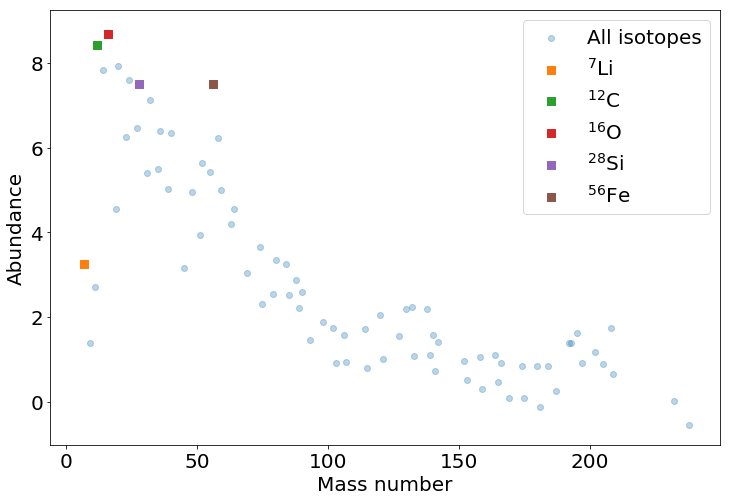

In [15]:
abundances_data = chem_lib.get_chem_data('ags09.yaml')["abundances"]
keys = [key for key in abundances_data.keys()]
#get some isotope indexes to plot then independently
ili7 = keys.index("li7")
ic12 = keys.index("c12")
io16 = keys.index("o16")
isi28 = keys.index("si28")
ife56 = keys.index("fe56")

mass_numbers = np.array([ISOTOPE_DATA[key]["mn"] for key in keys])
abundances = [abundances_data[key] for key in keys]

plt.gca().set_xlabel("Mass number")
plt.gca().set_ylabel("Abundance")

plt.scatter(mass_numbers,abundances, label="All isotopes",alpha=0.3)
plt.scatter(mass_numbers[ili7],abundances[ili7],
            marker="s", s=60, label="$^{7}$Li")
plt.scatter(mass_numbers[ic12],abundances[ic12],
            marker="s", s=60, label="$^{12}$C")
plt.scatter(mass_numbers[io16],abundances[io16],
            marker="s", s=60, label="$^{16}$O")
plt.scatter(mass_numbers[isi28],abundances[isi28],
            marker="s", s=60, label="$^{28}$Si")
plt.scatter(mass_numbers[ife56],abundances[ife56],
            marker="s", s=60, label="$^{56}$Fe")

plt.legend(loc=1)
plt.show()